In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

from utils.mch import MCHHandler
from utils.kde import smooth
wl = [i for i in range(660, 921, 10)]

%matplotlib inline

In [3]:
mch = MCHHandler()
mch.load_config("configs/phantom.json")
s, r = mch.run_wmc()

### H罐850, 860nm好像怪怪的

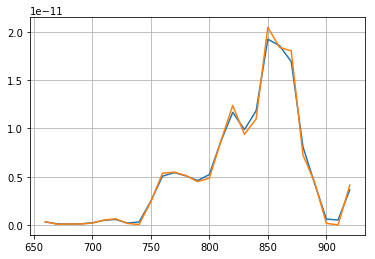

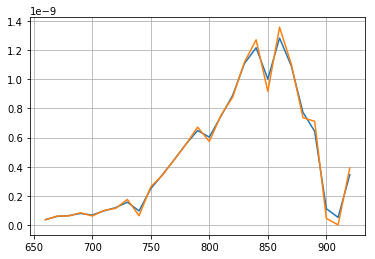

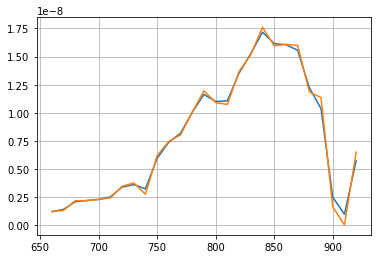

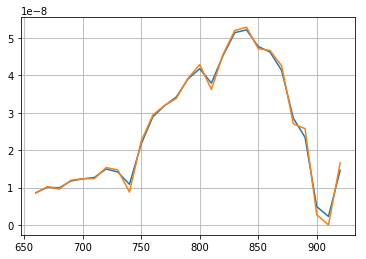

In [16]:
for i in range(4):
    plt.plot(wl, smooth(s[0, 1, i::4], 0.5))
    plt.plot(wl, s[0, 1, i::4])
    plt.grid()
    plt.show()

    

### 重跑850, 860nm看看

In [19]:
mch = MCHHandler()
mch.load_config("configs/phantom.json")
s2, r2 = mch.run_wmc()

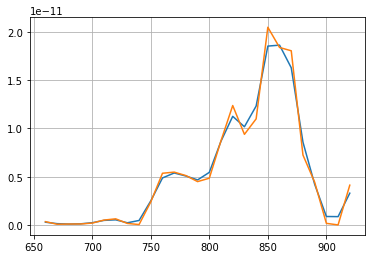

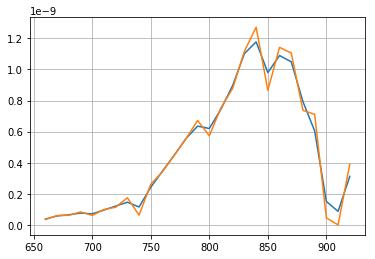

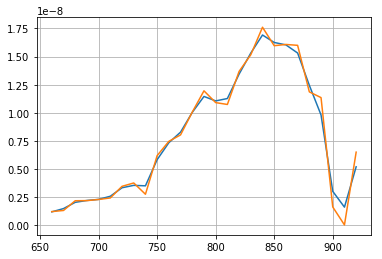

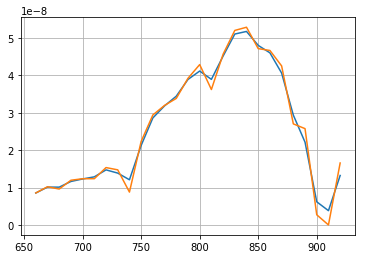

In [21]:
for i in range(4):
    plt.plot(wl, smooth(s2[0, 1, i::4], 0.6))
    plt.plot(wl, s2[0, 1, i::4])
    plt.grid()
    plt.show()

In [22]:
# 20 mm
pd.DataFrame({
    "wl": [i for i in range(660, 921, 10)],
    "c": s2[0, 0, 0::4],
    "h": s2[0, 0, 1::4],
    "i": s2[0, 0, 2::4],
    "k": s2[0, 0, 3::4]  
}).to_csv("CHIKEN/sim_20190525_20mm.csv")

In [23]:
# 24 mm
pd.DataFrame({
    "wl": [i for i in range(660, 921, 10)],
    "c": s2[0, 1, 0::4],
    "h": s2[0, 1, 1::4],
    "i": s2[0, 1, 2::4],
    "k": s2[0, 1, 3::4]  
}).to_csv("CHIKEN/sim_20190525_24mm.csv")

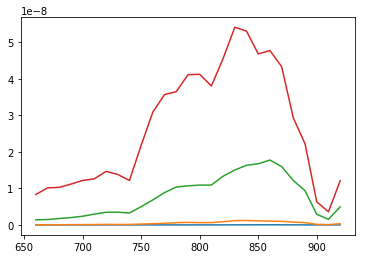

In [8]:
old_sim = pd.read_csv("CHIKEN/sim_20190522_no_prism.csv")
for i in "chik":
    plt.plot(wl, old_sim[i])

In [7]:
old_sim["wl"][27]

920

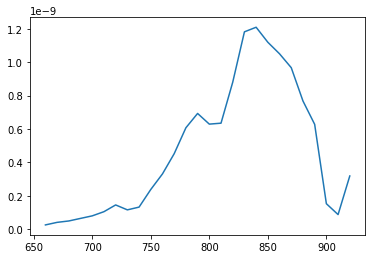

In [24]:
plt.plot(wl, old_sim["h"])

### 輸出MCML訪體摹擬

In [30]:
phantom = []
for pid in "chik":
    path = "mcml_phantom/output/{}.txt".format(pid)
    phantom += [np.loadtxt(path).T]
phantom = np.asarray(phantom)
phantom.shape

(4, 5, 27)

In [35]:
np.save("CHIKEN/phantom_muscle", phantom)

In [36]:
test = np.load("CHIKEN/phantom_muscle.pkl.npy")

In [37]:
test.shape

(4, 5, 27)